<a href="https://colab.research.google.com/github/abhijadhav14/PythonPractice/blob/main/team_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessory modules
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [ ]:
data = pd.read_csv('/content/16.txt',names=['X','Y'])
data

,X,Y
0,3.107671,27.372893
1,3.573528,23.200473
2,6.404848,24.535293
3,4.104839,25.099797
4,6.291361,24.117255
...,...,...
595,2.638047,17.500498
596,4.864167,24.657403
597,8.981562,27.523862
598,4.206712,19.128115


In [ ]:
x = list(map(float,data['X']))
y=list(map(float,data['Y']))

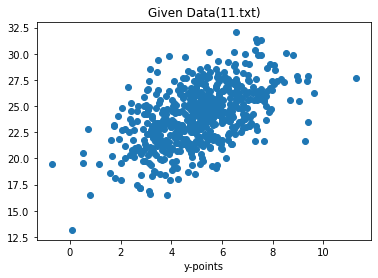

In [ ]:
# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x-points')
plt.xlabel('y-points')
plt.title("Given Data(11.txt)")
plt.show()

In [ ]:
#arranging the data to assign it to the tensor
A=[]
for i in x:
 i=[i]
 A.append(i)
b=[]
for i in y:
 i=[i]
 b.append(i)
#creating the tensors
X= torch.Tensor(A)
y= torch.Tensor(b)

In [ ]:
#defining the model
model = nn.Linear(1,1)
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

#loss function
criterion = nn.MSELoss()
#stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

iterations = 1001 #epochs
losses = []
for i in range (iterations):
 y_pred=model.forward(X)
 loss=criterion(y_pred,y)
 print(f"Epoch {i}: Loss: {loss}")
 losses.append(loss)
 optimizer.zero_grad()
 loss.backward()
 optimizer.step()

Epoch 0: Loss: 705.8871459960938
Epoch 1: Loss: 155.5100860595703
Epoch 2: Loss: 60.98221969604492
Epoch 3: Loss: 44.65789031982422
Epoch 4: Loss: 41.75014877319336
Epoch 5: Loss: 41.144466400146484
Epoch 6: Loss: 40.93410873413086
Epoch 7: Loss: 40.791954040527344
Epoch 8: Loss: 40.66187286376953
Epoch 9: Loss: 40.53425598144531
Epoch 10: Loss: 40.40743637084961
Epoch 11: Loss: 40.281131744384766
Epoch 12: Loss: 40.155296325683594
Epoch 13: Loss: 40.0299186706543
Epoch 14: Loss: 39.90498733520508
Epoch 15: Loss: 39.780513763427734
Epoch 16: Loss: 39.6564826965332
Epoch 17: Loss: 39.53290557861328
Epoch 18: Loss: 39.40977096557617
Epoch 19: Loss: 39.287086486816406
Epoch 20: Loss: 39.16484451293945
Epoch 21: Loss: 39.04304122924805
Epoch 22: Loss: 38.92168045043945
Epoch 23: Loss: 38.800750732421875
Epoch 24: Loss: 38.68026351928711
Epoch 25: Loss: 38.560203552246094
Epoch 26: Loss: 38.44059371948242
Epoch 27: Loss: 38.32140350341797
Epoch 28: Loss: 38.2026481628418
Epoch 29: Loss: 38.

## GRAPH PLOT OF EPOCH NUMBER AND ERROR

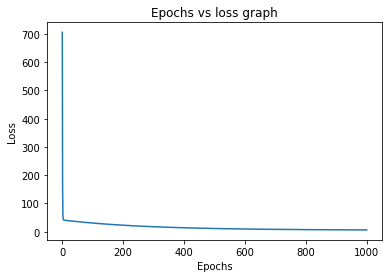

In [ ]:
plt.plot(range(iterations),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs loss graph')
plt.show()

##Graph plot of 10 different learning rates Vs. Error (cost).


In [ ]:
rate=[]
err=[]
all_loss=[]
theta0 = []
theta1 = []
l_rate=0.001
while(l_rate<0.01):
    model = nn.Linear(1,1)
    [a,b] = model.parameters()
    x=np.array(X)
    a = a[0][0].item()
    b = b[0].item()

    criterion = nn.MSELoss()

    optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)

    iterations = 1000
    losses = []
    for i in range (iterations):
        y_pred=model.forward(X)
        loss=criterion(y_pred,y)
        print(f"Epoch {i}: Loss: {loss}            W:{model.weight.data.item()}                 b:{model.bias.data.item()}")
        losses.append(loss)
        all_loss.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        theta0.append(model.weight.data)
        theta1.append(model.bias.data)
    rate.append(l_rate)
    err.append(loss)
    l_rate=l_rate+0.001

Streaming output truncated to the last 5000 lines.
Epoch 0: Loss: 509.8214111328125            W:0.25241172313690186                 b:0.3915119171142578
Epoch 1: Loss: 273.4921569824219            W:1.4074070453643799                 b:0.6158567667007446
Epoch 2: Loss: 155.3026123046875            W:2.223224639892578                 b:0.7793665528297424
Epoch 3: Loss: 96.18104553222656            W:2.7992119789123535                 b:0.8998557329177856
Epoch 4: Loss: 66.59260559082031            W:3.205617666244507                 b:0.9899208545684814
Epoch 5: Loss: 51.770320892333984            W:3.4921133518218994                 b:1.0584688186645508
Epoch 6: Loss: 44.33095932006836            W:3.693821668624878                 b:1.1117976903915405
Epoch 7: Loss: 40.58296203613281            W:3.835578680038452                 b:1.1543608903884888
Epoch 8: Loss: 38.68067169189453            W:3.9349446296691895                 b:1.1893072128295898
Epoch 9: Loss: 37.70124435424805 

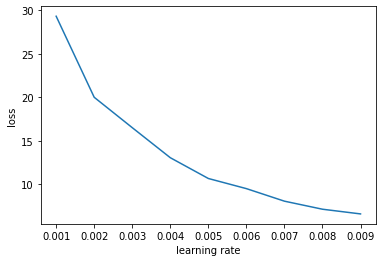

In [ ]:
plt.plot(rate,err)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.show()

##Graph plot of 10 different values for parameters (θ0 andθ1) Vs.Error (cost).

In [ ]:
list1=[theta0[50].item(),theta0[1000].item(),theta0[2000].item(),theta0[3000].item(),theta0[4000].item(),theta0[5000].item(),theta0[6000].item(),theta0[7000].item(),theta0[8000].item(),theta0[8500].item(),theta0[8999].item()]
list2=[theta1[50].item(),theta1[1000].item(),theta1[2000].item(),theta1[3000].item(),theta1[4000].item(),theta1[5000].item(),theta1[6000].item(),theta1[7000].item(),theta1[8000].item(),theta1[8500].item(),theta1[8999].item()]
list3=[all_loss[50].item(),all_loss[1000].item(),all_loss[2000].item(),all_loss[3000].item(),all_loss[4000].item(),all_loss[5000].item(),all_loss[6000].item(),all_loss[7000].item(),all_loss[8000].item(),all_loss[8500].item(),all_loss[8999].item()]
print(list1)
print(list2)
print(list3)

[3.760211944580078, 3.1316113471984863, 2.8445420265197754, 2.5114901065826416, 2.23378849029541, 2.074883222579956, 1.8423633575439453, 1.6569359302520752, 1.5241774320602417, 1.5241774320602417, 1.5241774320602417]
[3.5858659744262695, 7.091439247131348, 8.692363739013672, 10.549724578857422, 12.098405838012695, 12.984585762023926, 14.28130054473877, 15.315390586853027, 16.055757522583008, 16.055757522583008, 16.055757522583008]
[40.561866760253906, 552.447265625, 421.1365051269531, 546.7553100585938, 509.8214111328125, 477.5, 729.3258056640625, 425.1207275390625, 771.3673095703125, 11.342704772949219, 6.597867012023926]


In [ ]:
pd = []
ls = []
for i in range(10):
    pd1 = []
    # for j in x:
    pd.append(list1[i]*x[0]+list2[i])
    ls.append(list3[i])
    # pd.append(pd1)


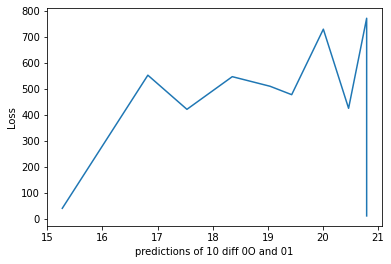

In [ ]:
plt.plot(pd,ls)
plt.xlabel('predictions of 10 diff 0O and 01')
plt.ylabel('Loss')
plt.show()

Gradient descent algorithm should stop running when an error (cost) is not getting decreased much compared to last few epochs instead of running till last epoch

In [ ]:
model = nn.Linear(1,1)
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

iterations = 10000
losses = []
for i in range (iterations):
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  print(f"Epoch {i}: Loss: {loss}")
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if len(losses)>1 and losses[len(losses)-2]==loss:
			break

Epoch 0: Loss: 645.1680297851562
Epoch 1: Loss: 143.5580596923828
Epoch 2: Loss: 57.40199279785156
Epoch 3: Loss: 42.51942443847656
Epoch 4: Loss: 39.86452102661133
Epoch 5: Loss: 39.307701110839844
Epoch 6: Loss: 39.11119079589844
Epoch 7: Loss: 38.97685623168945
Epoch 8: Loss: 38.85354995727539
Epoch 9: Loss: 38.73249435424805
Epoch 10: Loss: 38.612186431884766
Epoch 11: Loss: 38.49237060546875
Epoch 12: Loss: 38.372989654541016
Epoch 13: Loss: 38.25404357910156
Epoch 14: Loss: 38.13553237915039
Epoch 15: Loss: 38.01744842529297
Epoch 16: Loss: 37.89978790283203
Epoch 17: Loss: 37.78254699707031
Epoch 18: Loss: 37.665740966796875
Epoch 19: Loss: 37.54935073852539
Epoch 20: Loss: 37.433380126953125
Epoch 21: Loss: 37.31782913208008
Epoch 22: Loss: 37.202693939208984
Epoch 23: Loss: 37.08797836303711
Epoch 24: Loss: 36.973670959472656
Epoch 25: Loss: 36.85978317260742
Epoch 26: Loss: 36.74630355834961
Epoch 27: Loss: 36.63322830200195
Epoch 28: Loss: 36.520572662353516
Epoch 29: Loss: 

Dataset should be divided randomly like 70% for training and 30% for testing, so the algorithm should calculate parameters (θ0 andθ1) values by using only 70% data and find both training error (cost) and testing error (cost).

In [ ]:
#importing train test split from sklearn
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data['X'], data['Y'], test_size = 0.3, random_state = 20)

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {X_test.shape[0]}")

x = X_train
y = Y_train

No. of training examples: 420
No. of testing examples: 180


In [ ]:
A=[]
for i in x:
 i=[i]
 A.append(i)
b=[]
for i in y:
 i=[i]
 b.append(i)

X= torch.Tensor(A)
y= torch.Tensor(b)
model = nn.Linear(1,1)
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

iterations = 10000
losses = []
for i in range (iterations):
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  print(f"Epoch {i}: Loss: {loss}")
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if len(losses)>1 and losses[len(losses)-2]==loss:
			break

Epoch 0: Loss: 767.2849731445312
Epoch 1: Loss: 166.18283081054688
Epoch 2: Loss: 61.65182113647461
Epoch 3: Loss: 43.38846206665039
Epoch 4: Loss: 40.11241149902344
Epoch 5: Loss: 39.4404296875
Epoch 6: Loss: 39.22122573852539
Epoch 7: Loss: 39.08103942871094
Epoch 8: Loss: 38.95497131347656
Epoch 9: Loss: 38.83171844482422
Epoch 10: Loss: 38.70932388305664
Epoch 11: Loss: 38.58744430541992
Epoch 12: Loss: 38.466026306152344
Epoch 13: Loss: 38.34505081176758
Epoch 14: Loss: 38.22452163696289
Epoch 15: Loss: 38.10443115234375
Epoch 16: Loss: 37.984771728515625
Epoch 17: Loss: 37.86555480957031
Epoch 18: Loss: 37.74677276611328
Epoch 19: Loss: 37.628421783447266
Epoch 20: Loss: 37.51050567626953
Epoch 21: Loss: 37.39302062988281
Epoch 22: Loss: 37.275962829589844
Epoch 23: Loss: 37.15932846069336
Epoch 24: Loss: 37.043121337890625
Epoch 25: Loss: 36.927345275878906
Epoch 26: Loss: 36.81198501586914
Epoch 27: Loss: 36.69704818725586
Epoch 28: Loss: 36.5825309753418
Epoch 29: Loss: 36.468

In [ ]:
print("training_cost:",loss.item())

training_cost: 5.316184043884277


In [ ]:
x=X_test
y=Y_test

In [ ]:
A=[]
for i in x:
 i=[i]
 A.append(i)
b=[]
for i in y:
 i=[i]
 b.append(i)

X= torch.Tensor(A)
y= torch.Tensor(b)
model = nn.Linear(1,1)
[a,b] = model.parameters()
x=np.array(X)
a = a[0][0].item()
b = b[0].item()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

iterations = 10000
losses = []
for i in range (iterations):
  y_pred=model.forward(X)
  loss=criterion(y_pred,y)
  print(f"Epoch {i}: Loss: {loss}")
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if len(losses)>1 and losses[len(losses)-2]==loss:
			break

Epoch 0: Loss: 490.7410583496094
Epoch 1: Loss: 115.63566589355469
Epoch 2: Loss: 53.062217712402344
Epoch 3: Loss: 42.53873825073242
Epoch 4: Loss: 40.6840934753418
Epoch 5: Loss: 40.273536682128906
Epoch 6: Loss: 40.10383605957031
Epoch 7: Loss: 39.97460174560547
Epoch 8: Loss: 39.85247039794922
Epoch 9: Loss: 39.73186492919922
Epoch 10: Loss: 39.61188507080078
Epoch 11: Loss: 39.492340087890625
Epoch 12: Loss: 39.37322998046875
Epoch 13: Loss: 39.254539489746094
Epoch 14: Loss: 39.136268615722656
Epoch 15: Loss: 39.018409729003906
Epoch 16: Loss: 38.90096664428711
Epoch 17: Loss: 38.783935546875
Epoch 18: Loss: 38.667320251464844
Epoch 19: Loss: 38.55111312866211
Epoch 20: Loss: 38.43531799316406
Epoch 21: Loss: 38.31992721557617
Epoch 22: Loss: 38.20494079589844
Epoch 23: Loss: 38.09036636352539
Epoch 24: Loss: 37.976192474365234
Epoch 25: Loss: 37.86241912841797
Epoch 26: Loss: 37.749046325683594
Epoch 27: Loss: 37.63607406616211
Epoch 28: Loss: 37.523502349853516
Epoch 29: Loss: 

In [ ]:
print("testing_cost:",loss.item())

testing_cost: 5.662822246551514
